In [1]:
import numpy as np
import pandas as pd
import networkx as nx
import plotly.io as pio
import plotly.express as px
import plotly.graph_objects as go
import igviz as ig
from node2vec import Node2Vec
from gensim.models import KeyedVectors

%load_ext autoreload
%autoreload 2


# import src.preprocess as pre
# import src.visualize as vis
# pio.renderers.default = "png"


/nethome/mbafna6/miniconda3/envs/CeSpGRN/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
np.load('./out/preprocessing_output/initial_grns.npy').shape

(1597, 45, 45)

In [4]:
LR_df = pd.read_csv("./data/celltalk_human_lr_pair.txt", sep="\t")
receptors = set(LR_df["receptor_gene_symbol"].to_list())
ligands = set(LR_df["ligand_gene_symbol"].to_list())

sample_counts = pd.read_csv("./data/seqFISH/counts.csv")
gene_names = set(map(lambda x: x.upper(), sample_counts.columns.to_numpy()))


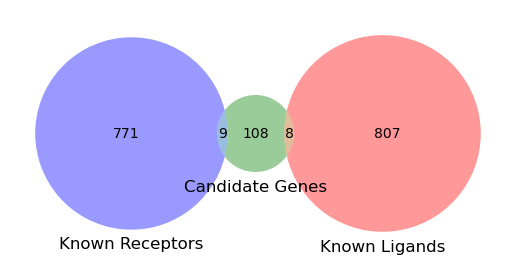

In [5]:
from matplotlib_venn import venn3

venn3((ligands, gene_names,receptors),("Known Ligands", "Candidate Genes", "Known Receptors") )


In [5]:
np.load("./out/preprocessing_output/celllevel_features.npy").shape

(1597, 127)

In [6]:
wv_from_text = KeyedVectors.load_word2vec_format("./out/preprocessing_output/genelevel_features")
# np.load("./out/preprocessing_output/genelevel_features", allow_pickle=True).shape

FileNotFoundError: [Errno 2] No such file or directory: './out/preprocessing_output/genelevel_features'

In [20]:
# np.array([vector for vector in wv_from_text])
from gensim.models import Word2Vec

model = Word2Vec.load("./out/preprocessing_output/genelevel_feature_model")
np.save("./out/preprocessing_output/genelevel_features.npy", model.wv.vectors)


In [4]:
np.load('./out/preprocessing_output/celllevel_adjacencymatrix.npy')

array([[0., 1., 1., ..., 0., 0., 0.],
       [1., 0., 1., ..., 0., 0., 0.],
       [1., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [19]:
df = pd.DataFrame(np.load('./out/preprocessing_output/celllevel_features.npy'))
df

,0,1,2,3,4,5,6,7,8,9,...,115,116,117,118,119,120,121,122,123,124
0,1.83,1.52,2.41,-0.02,-0.28,1.95,0.04,0.10,0.91,-0.24,...,0.12,-1.32,-2.06,-1.32,0.19,-2.20,-1.54,-1.40,2.51,0.60
1,0.38,-0.04,0.59,0.03,0.93,0.49,0.08,2.05,-0.17,-0.11,...,-1.60,-0.64,-2.47,-1.34,0.00,0.22,-1.46,0.22,1.88,2.05
2,0.82,0.12,0.67,-0.29,-0.42,-0.04,1.35,0.68,0.08,0.05,...,-0.66,-0.78,-1.07,-2.09,0.09,0.32,-2.29,0.15,3.20,2.30
3,0.04,-1.27,-0.30,-0.52,-2.08,0.92,-0.03,0.42,-0.27,0.30,...,-0.85,-1.16,-1.29,-0.57,0.99,-0.19,-1.49,0.65,3.04,2.00
4,0.52,0.44,-1.05,0.48,-0.49,2.29,0.27,0.67,-1.00,0.43,...,-0.65,-0.97,-1.29,-1.77,1.09,-1.17,-2.11,0.36,2.47,1.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1592,-0.17,-0.50,1.03,0.90,0.23,0.48,0.73,0.96,1.01,-0.66,...,-0.79,-0.31,-3.45,-2.60,-1.13,-1.97,-0.82,-1.53,2.21,0.54
1593,0.20,0.95,0.57,0.77,-2.34,-0.29,0.13,0.84,1.26,-0.09,...,-0.57,-0.33,-1.13,-0.68,-0.06,-1.55,-0.43,-0.60,2.66,0.23
1594,-1.06,-0.18,-0.33,-0.05,-0.26,-0.22,0.32,0.18,0.20,0.45,...,1.04,0.54,1.38,0.90,-0.41,-1.69,0.36,-0.49,0.80,0.39
1595,-1.99,-0.25,1.34,0.00,-0.01,0.95,1.23,0.72,0.31,-0.15,...,-1.28,-1.25,1.58,-2.68,-0.77,0.27,-0.60,-0.14,-2.66,0.37


In [20]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,115,116,117,118,119,120,121,122,123,124
count,1597.000000,1597.000000,1597.000000,1597.000000,1597.000000,1597.000000,1597.000000,1597.000000,1597.000000,1597.000000,...,1597.000000,1597.000000,1597.000000,1597.000000,1597.000000,1597.000000,1597.000000,1597.000000,1597.000000,1597.000000
mean,-0.004634,0.000795,-0.006738,-0.002148,0.004101,-0.011146,-0.004890,-0.004959,-0.003431,-0.004909,...,0.010438,0.017101,0.009317,0.011760,-0.004696,0.004759,0.016287,0.003582,0.001202,-0.001816
std,1.004863,1.003174,1.009325,1.002433,0.995672,1.014559,1.005069,1.006324,1.004245,1.012613,...,0.987435,0.972709,0.975218,0.979422,1.015804,0.984703,0.965073,0.987810,0.990594,1.001660
min,-4.290000,-4.110000,-4.500000,-4.370000,-4.330000,-4.100000,-4.460000,-4.260000,-4.170000,-4.320000,...,-3.170000,-4.600000,-3.580000,-3.810000,-4.520000,-4.700000,-6.160000,-6.030000,-3.610000,-4.360000
25%,-0.670000,-0.690000,-0.660000,-0.700000,-0.640000,-0.670000,-0.650000,-0.690000,-0.690000,-0.660000,...,-0.610000,-0.630000,-0.590000,-0.590000,-0.620000,-0.510000,-0.560000,-0.450000,-0.590000,-0.580000
50%,0.110000,0.120000,0.080000,0.140000,0.170000,0.060000,0.120000,0.090000,0.150000,0.060000,...,0.020000,0.070000,0.150000,0.090000,0.030000,0.150000,0.140000,0.090000,-0.020000,0.080000
75%,0.740000,0.700000,0.720000,0.730000,0.740000,0.780000,0.720000,0.760000,0.740000,0.720000,...,0.630000,0.700000,0.710000,0.710000,0.640000,0.680000,0.700000,0.600000,0.500000,0.620000
max,2.570000,2.570000,2.410000,2.930000,2.620000,2.630000,2.480000,2.470000,2.430000,2.920000,...,3.790000,2.740000,2.410000,3.070000,2.980000,2.470000,2.370000,3.920000,4.180000,5.150000


In [12]:
from src import models, training
from torch_geometric.nn import GAE
import torch
import os

preprocess_output_path = "./out/preprocessing_output/"
training_output_path = "./out/training_output/"
celllevel_data, genelevel_data = training.create_pyg_data(preprocess_output_path)
data = (celllevel_data, genelevel_data)

data


(Data(x=[1597, 125], edge_index=[2, 7985], y=[1597, 1597]),
 Data(x=[71865, 64], edge_index=[2, 1824841]))

In [13]:
def build_clarifyGAE_pytorch(data, hyperparams = None):
    num_cells, num_cellfeatures = data[0].x.shape[0], data[0].x.shape[1]
    num_genes, num_genefeatures = data[1].x.shape[0], data[1].x.shape[1]
    hidden_dim = hyperparams["concat_hidden_dim"] // 2
    num_genespercell = hyperparams["num_genespercell"]

    cellEncoder = models.GraphEncoder(num_cellfeatures, hidden_dim)
    geneEncoder = models.SubgraphEncoder(num_features=num_genefeatures, hidden_dim=hidden_dim, num_vertices = num_cells, num_subvertices = num_genespercell)
    
    multiviewEncoder = models.MultiviewEncoder(SubgraphEncoder = geneEncoder, GraphEncoder = cellEncoder)
    gae = GAE(multiviewEncoder)

    return gae


hyperparameters = {
    "num_genespercell": 45,
    "concat_hidden_dim": 64,
    "optimizer" : "adam",
    "criterion" : torch.nn.BCELoss(),
    "num_epochs": 400
}

trained_gae = build_clarifyGAE_pytorch(data, hyperparameters)
trained_gae.load_state_dict(torch.load(os.path.join(training_output_path,f'trained_gae_model.pth')))
trained_gae.eval()

GAE(
  (encoder): MultiviewEncoder(
    (encoder_g): SubgraphEncoder(
      (conv1): GCNConv(64, 32)
      (conv2): GCNConv(32, 32)
      (linear): Linear(in_features=1440, out_features=32, bias=True)
    )
    (encoder_c): GraphEncoder(
      (conv1): GCNConv(125, 32)
      (conv2): GCNConv(32, 32)
    )
  )
  (decoder): InnerProductDecoder()
)

In [14]:
cell_level_encoder = trained_gae.encoder.encoder_c
gene_level_encoder = trained_gae.encoder.encoder_g
z = trained_gae.encode(data[0].x,data[1].x, data[0].edge_index, data[1].edge_index)
z_c = cell_level_encoder(data[0].x, data[0].edge_index)
z_g = gene_level_encoder.embed(data[1].x, data[1].edge_index)


In [15]:
z,z.shape

(tensor([[-0.1112,  0.1229, -0.2332,  ...,  0.0674,  0.0020, -0.0342],
         [-0.1296,  0.1299, -0.2572,  ...,  0.0346,  0.0223, -0.0537],
         [-0.0744,  0.1145, -0.1754,  ...,  0.0124,  0.0714, -0.0825],
         ...,
         [ 0.0970,  0.0127,  0.1533,  ...,  0.0845, -0.0419,  0.0275],
         [-0.0340, -0.0606, -0.3503,  ..., -0.0693,  0.0326, -0.0410],
         [ 0.0226, -0.0130, -0.4287,  ..., -0.1413,  0.1442, -0.1397]],
        grad_fn=<CatBackward0>),
 torch.Size([1597, 64]))

In [16]:
z_c,z_c.shape

(tensor([[-0.1112,  0.1229, -0.2332,  ...,  0.0888, -0.2396, -0.3305],
         [-0.1296,  0.1299, -0.2572,  ...,  0.0953, -0.2569, -0.3565],
         [-0.0744,  0.1145, -0.1754,  ...,  0.1117, -0.1832, -0.2226],
         ...,
         [ 0.0970,  0.0127,  0.1533,  ..., -0.1178, -0.5628,  0.2156],
         [-0.0340, -0.0606, -0.3503,  ...,  0.1191,  0.2159,  0.6880],
         [ 0.0226, -0.0130, -0.4287,  ...,  0.1142,  0.1929,  0.5404]],
        grad_fn=<AddBackward0>),
 torch.Size([1597, 32]))

In [17]:
z_g, z_g.shape

(tensor([[-2.1153e-02, -6.9548e-03,  1.8205e-05,  ...,  1.0911e-02,
           7.8208e-03,  4.7564e-02],
         [-1.0616e-02, -1.1525e-02,  5.1655e-03,  ...,  2.8392e-02,
           7.4270e-04,  4.9644e-02],
         [ 5.0740e-03, -2.7834e-02,  1.7913e-03,  ...,  2.4759e-02,
          -2.4404e-04,  4.3329e-02],
         ...,
         [-4.9639e-02, -2.9899e-02, -4.0271e-02,  ..., -4.8675e-02,
           7.9036e-03,  1.3046e-02],
         [-5.2377e-02, -3.2574e-02, -3.8744e-02,  ..., -4.4512e-02,
           1.4279e-02,  1.8906e-02],
         [-1.6025e-02, -3.2065e-02, -3.3183e-02,  ..., -1.9597e-02,
           6.1737e-03,  4.5368e-02]], grad_fn=<AddBackward0>),
 torch.Size([71865, 32]))